**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Import Dataset
data = pd.read_csv('/content/Admission_Predict.csv')
data.shape

(400, 9)

In [ ]:
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [ ]:
data.columns.values

array(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating',
       'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype=object)

In [ ]:
data.drop('Serial No.', axis=1, inplace=True)

In [ ]:
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

**Data Analysis**

In [ ]:
#Let's see top 10 observation row and column wise
data.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [ ]:
## General statistics of the data
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
# reading the dataset
df = pd.read_csv("/content/Admission_Predict.csv")
df.shape

(400, 9)

In [ ]:
# it may be needed in the future.
serialNo = df["Serial No."].values
df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [ ]:
X = df.drop(["Chance of Admit"],axis=1)
y = df["Chance of Admit"].values

In [ ]:
# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

In [ ]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

In [ ]:
y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01  = [1 if each > 0.8 else 0 for each in y_test]

# list to array
y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train_01)

LogisticRegression()

In [ ]:
y_predlogr = logr.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_predlogr, y_test_01))

Accuracy Score: 0.975


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_01,y_predlogr))
cm_lrc = confusion_matrix(y_test_01,y_predlogr)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

[[67  1]
 [ 1 11]]


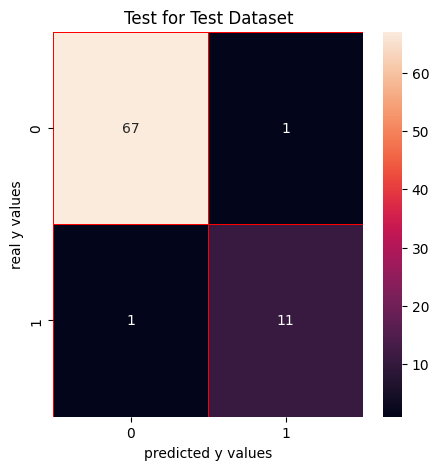

In [ ]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_predlogr))
print("recall_score: ", recall_score(y_test_01, y_predlogr))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_predlogr))

precision_score:  0.9166666666666666
recall_score:  0.9166666666666666
f1_score:  0.9166666666666666


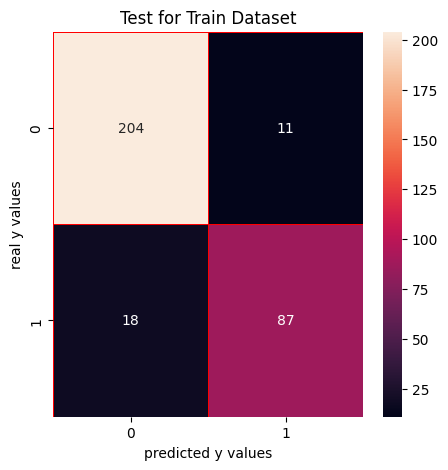

In [ ]:
#Test for Train Dataset
cm_lrc_train = confusion_matrix(y_train_01,logr.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train,y_train_01)
y_pred_svm = svm.predict(X_test)
print("score: ", svm.score(X_test,y_test_01))

score:  0.9375


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test_01,y_pred_svm)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_svm

array([[65,  3],
       [ 2, 10]])

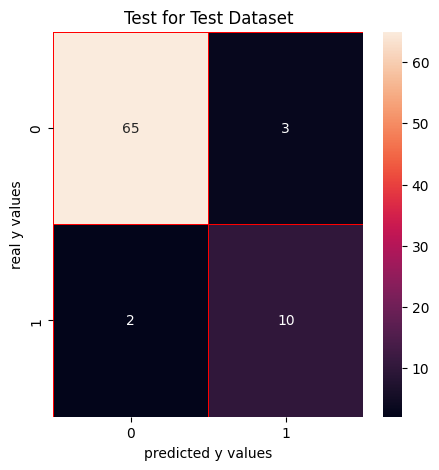

In [ ]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_svm))
print("recall_score: ", recall_score(y_test_01,y_pred_svm))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_svm))

precision_score:  0.7692307692307693
recall_score:  0.8333333333333334
f1_score:  0.8


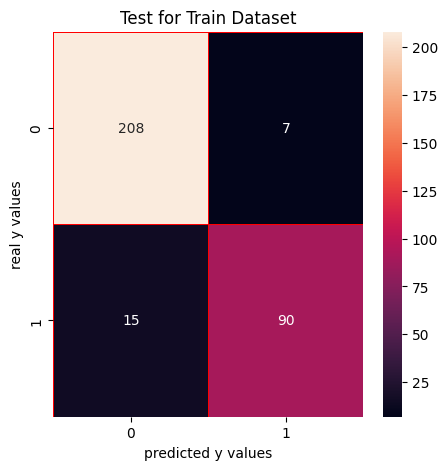

In [ ]:
#Test for Train Dataset

cm_svm_train = confusion_matrix(y_train_01, svm.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm_train, annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

**Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train_01)
y_pred_dtc = dtc.predict(X_test)
print("score: ", dtc.score(X_test,y_test_01))

score:  0.925


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test_01, y_pred_dtc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_dtc


array([[65,  3],
       [ 3,  9]])

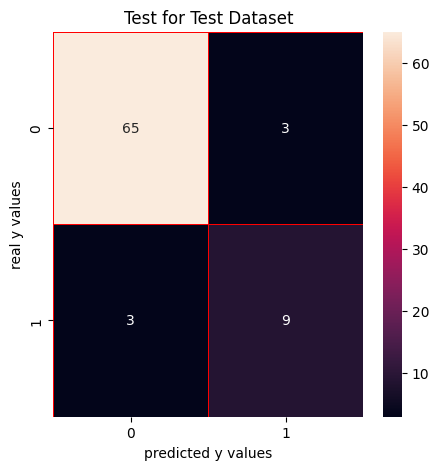

In [ ]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test_01, y_pred_dtc)
recall = recall_score(y_test_01, y_pred_dtc)
f1 = f1_score(y_test_01, y_pred_dtc)

print("precision_score:", precision)
print("recall_score:", recall)
print("f1_score:", f1)


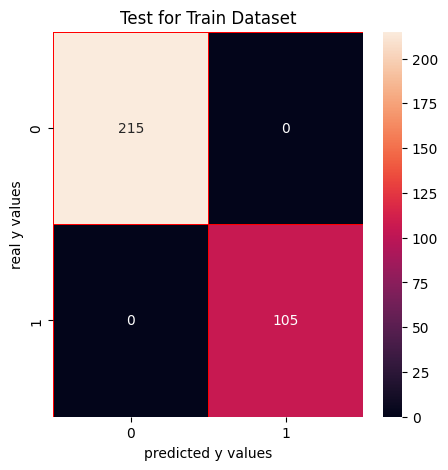

In [ ]:
#Test for Train Dataset:
cm_dtc_train = confusion_matrix(y_train_01,dtc.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

**Random Forest Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,random_state = 1)
rfc.fit(X_train,y_train_01)

y_pred_rfc = rfc.predict(X_test)

print("score: ", rfc.score(X_test, y_test_01))

score:  0.9375


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test_01, y_pred_rfc)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_rfc

array([[65,  3],
       [ 2, 10]])

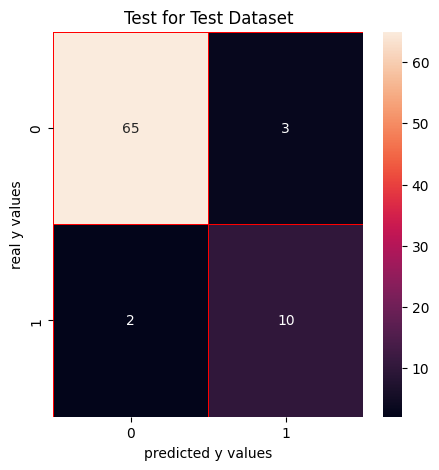

In [ ]:
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_rfc))
print("recall_score: ", recall_score(y_test_01, y_pred_rfc))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_rfc))

precision_score:  0.7692307692307693
recall_score:  0.8333333333333334
f1_score:  0.8


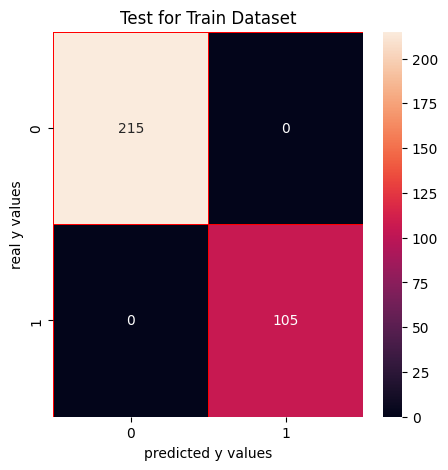

In [ ]:
#Test for Train Dataset:

cm_rfc_train = confusion_matrix(y_train_01, rfc.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

**K Nearest Neighbors Classification**

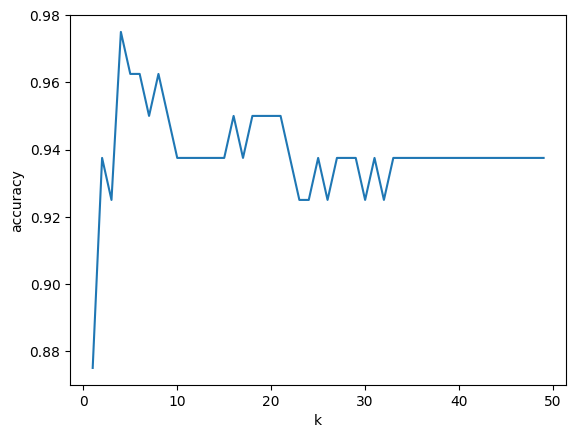

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# finding k value
scores = []
for each in range(1,50):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(X_train, y_train_01)
    scores.append(knn_n.score(X_test, y_test_01))

plt.plot(range(1,50),scores)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(X_train, y_train_01)

y_pred_knn = knn.predict(X_test)
print("score of 3 :",knn.score(X_test,y_test_01))

score of 3 : 0.925


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test_01, y_pred_knn)
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
cm_knn

array([[63,  5],
       [ 1, 11]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01, y_pred_knn))
print("recall_score: ", recall_score(y_test_01, y_pred_knn))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01, y_pred_knn))

precision_score:  0.6875
recall_score:  0.9166666666666666
f1_score:  0.7857142857142857


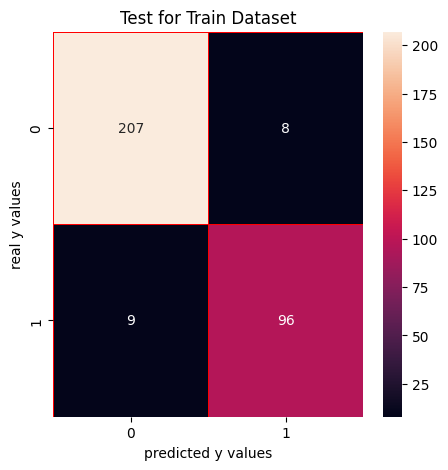

In [ ]:
cm_knn_train = confusion_matrix(y_train_01,knn.predict(X_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

**Error Rates for Algorithms**

**MAE, MAPE, RMSE error rates in logistic regression**

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generate synthetic dataset for regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
lr_mae = mean_absolute_error(y_test, lr_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
lr_mape = mean_absolute_percentage_error(y_test, lr_pred)

# Calculate Root Mean Squared Error (RMSE)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

# Print error rates
print("Error Rates for Logistic Regression:")
print("Mean Absolute Error (MAE):", lr_mae)
print("Mean Absolute Percentage Error (MAPE):", lr_mape)
print("Root Mean Squared Error (RMSE):", lr_rmse)


Error Rates for Logistic Regression:
Mean Absolute Error (MAE): 0.07773328130097608
Mean Absolute Percentage Error (MAPE): 0.21355212292479647
Root Mean Squared Error (RMSE): 0.0975290464960002


**MAE, MAPE, RMSE error rates in Support Vector Machine**

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Generate synthetic dataset for regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Regression
svm_model = SVR(kernel='linear')  # You can choose different kernels ('linear', 'poly', 'rbf', etc.)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
svm_mae = mean_absolute_error(y_test, svm_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
svm_mape = mean_absolute_percentage_error(y_test, svm_pred)

# Calculate Root Mean Squared Error (RMSE)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))

# Print error rates
print("Error Rates for Support Vector Regression (SVM):")
print("Mean Absolute Error (MAE):", svm_mae)
print("Mean Absolute Percentage Error (MAPE):", svm_mape)
print("Root Mean Squared Error (RMSE):", svm_rmse)


Error Rates for Support Vector Regression (SVM):
Mean Absolute Error (MAE): 0.08034971467537222
Mean Absolute Percentage Error (MAPE): 0.2138065681003479
Root Mean Squared Error (RMSE): 0.10091852930975137


**MAE,MAPE, RMSE error rates in Random Forest**

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Generate synthetic dataset for regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_pred = rf_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
rf_mae = mean_absolute_error(y_test, rf_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
rf_mape = mean_absolute_percentage_error(y_test, rf_pred)

# Calculate Root Mean Squared Error (RMSE)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

# Print error rates
print("Error Rates for Random Forest Regression:")
print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Absolute Percentage Error (MAPE):", rf_mape)
print("Root Mean Squared Error (RMSE):", rf_rmse)


Error Rates for Random Forest Regression:
Mean Absolute Error (MAE): 40.177080494230346
Mean Absolute Percentage Error (MAPE): 93.62184826894912
Root Mean Squared Error (RMSE): 51.20344866411072


**MAE,MAPE, RMSE error rates in Decision Trees**

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Generate synthetic dataset for regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_pred = dt_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
dt_mae = mean_absolute_error(y_test, dt_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
dt_mape = mean_absolute_percentage_error(y_test, dt_pred)

# Calculate Root Mean Squared Error (RMSE)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))

# Print error rates
print("Error Rates for Decision Tree Regression:")
print("Mean Absolute Error (MAE):", dt_mae)
print("Mean Absolute Percentage Error (MAPE):", dt_mape)
print("Root Mean Squared Error (RMSE):", dt_rmse)


Error Rates for Decision Tree Regression:
Mean Absolute Error (MAE): 61.95266831566605
Mean Absolute Percentage Error (MAPE): 205.0703910120886
Root Mean Squared Error (RMSE): 79.68957138012644


**MAE,MAPE, RMSE error rates in KNN**

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Generate synthetic dataset for regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)

# Predict on the test set
knn_pred = knn_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
knn_mae = mean_absolute_error(y_test, knn_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
knn_mape = mean_absolute_percentage_error(y_test, knn_pred)

# Calculate Root Mean Squared Error (RMSE)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))

# Print error rates
print("Error Rates for K-Nearest Neighbors (KNN) Regression:")
print("Mean Absolute Error (MAE):", knn_mae)
print("Mean Absolute Percentage Error (MAPE):", knn_mape)
print("Root Mean Squared Error (RMSE):", knn_rmse)


Error Rates for K-Nearest Neighbors (KNN) Regression:
Mean Absolute Error (MAE): 48.86073406351671
Mean Absolute Percentage Error (MAPE): 129.09868615163862
Root Mean Squared Error (RMSE): 61.060169455816194


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Results for each model
results = {
    "Model": ["Logistic Regression", "Support Vector Machine (SVM)", "Random Forest Classification", "Decision Trees classification ", "K-Nearest Neighbors (KNN) Classification"],
    "MAE": [lr_mae, svm_mae, rf_mae, dt_mape, knn_mae],
    "MAPE": [lr_mape, svm_mape, rf_mape, dt_mape, knn_mape],
    "RMSE": [lr_rmse, svm_rmse, rf_rmse, dt_rmse, knn_rmse],
    "Accuracy": [lr_model.score(X_test, y_test), svm_model.score(X_test, y_test), rf_model.score(X_test, y_test), dt_model.score(X_test, y_test), knn_model.score(X_test, y_test)]
}

# Creating DataFrame
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)



                                      Model         MAE        MAPE  \
0                       Logistic Regression    0.077733    0.213552   
1              Support Vector Machine (SVM)    0.080350    0.213807   
2              Random Forest Classification   40.177080   93.621848   
3            Decision Trees classification   205.070391  205.070391   
4  K-Nearest Neighbors (KNN) Classification   48.860734  129.098686   

        RMSE  Accuracy  
0   0.097529  0.999999  
1   0.100919  0.999999  
2  51.203449  0.844599  
3  79.689571  0.623592  
4  61.060169  0.779010  


In [ ]:
#table for recall,f1,precision

import pandas as pd

# Calculate precision, recall, and F1 score for each model
results = {
    "Model": ["Logistic Regression", "Support Vector Machine", "Decision Tree", "Random Forest", "K Nearest Neighbors"],
    "Precision": [precision_score(y_test_01, y_predlogr), precision_score(y_test_01, y_pred_svm), precision_score(y_test_01, y_pred_dtc), precision_score(y_test_01, y_pred_rfc), precision_score(y_test_01, y_pred_knn)],
    "Recall": [recall_score(y_test_01, y_predlogr), recall_score(y_test_01, y_pred_svm), recall_score(y_test_01, y_pred_dtc), recall_score(y_test_01, y_pred_rfc), recall_score(y_test_01, y_pred_knn)],
    "F1 Score": [f1_score(y_test_01, y_predlogr), f1_score(y_test_01, y_pred_svm), f1_score(y_test_01, y_pred_dtc), f1_score(y_test_01, y_pred_rfc), f1_score(y_test_01, y_pred_knn)]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


                    Model  Precision    Recall  F1 Score
0     Logistic Regression   0.916667  0.916667  0.916667
1  Support Vector Machine   0.769231  0.833333  0.800000
2           Decision Tree   0.750000  0.750000  0.750000
3           Random Forest   0.769231  0.833333  0.800000
4     K Nearest Neighbors   0.687500  0.916667  0.785714


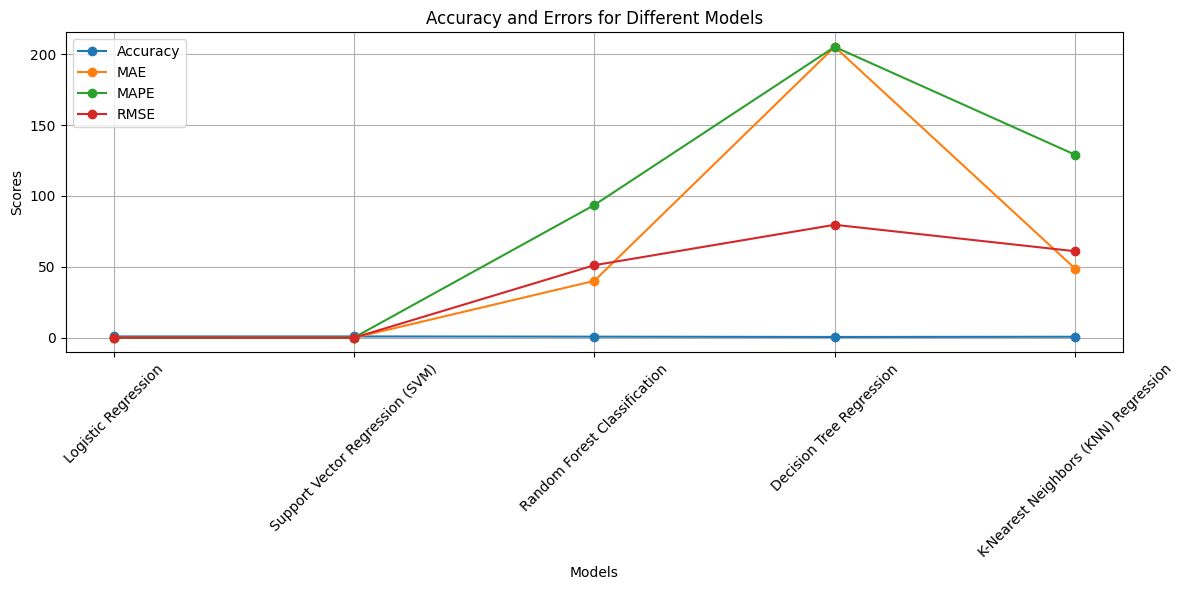

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Results for each model
results = {
    "Model": ["Logistic Regression", "Support Vector Regression (SVM)", "Random Forest Classification", "Decision Tree Regression", "K-Nearest Neighbors (KNN) Regression"],
    "MAE": [lr_mae, svm_mae, rf_mae, dt_mape, knn_mae],
    "MAPE": [lr_mape, svm_mape, rf_mape, dt_mape, knn_mape],
    "RMSE": [lr_rmse, svm_rmse, rf_rmse, dt_rmse, knn_rmse],
    "Accuracy": [lr_model.score(X_test, y_test), svm_model.score(X_test, y_test), rf_model.score(X_test, y_test), dt_model.score(X_test, y_test), knn_model.score(X_test, y_test)]
}

# Creating DataFrame
results_df = pd.DataFrame(results)

# Plotting the graph
plt.figure(figsize=(12, 6))

# Accuracy
plt.plot(results_df['Model'], results_df['Accuracy'], marker='o', label='Accuracy')

# Mean Absolute Error (MAE)
plt.plot(results_df['Model'], results_df['MAE'], marker='o', label='MAE')

# Mean Absolute Percentage Error (MAPE)
plt.plot(results_df['Model'], results_df['MAPE'], marker='o', label='MAPE')

# Root Mean Squared Error (RMSE)
plt.plot(results_df['Model'], results_df['RMSE'], marker='o', label='RMSE')

plt.title('Accuracy and Errors for Different Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


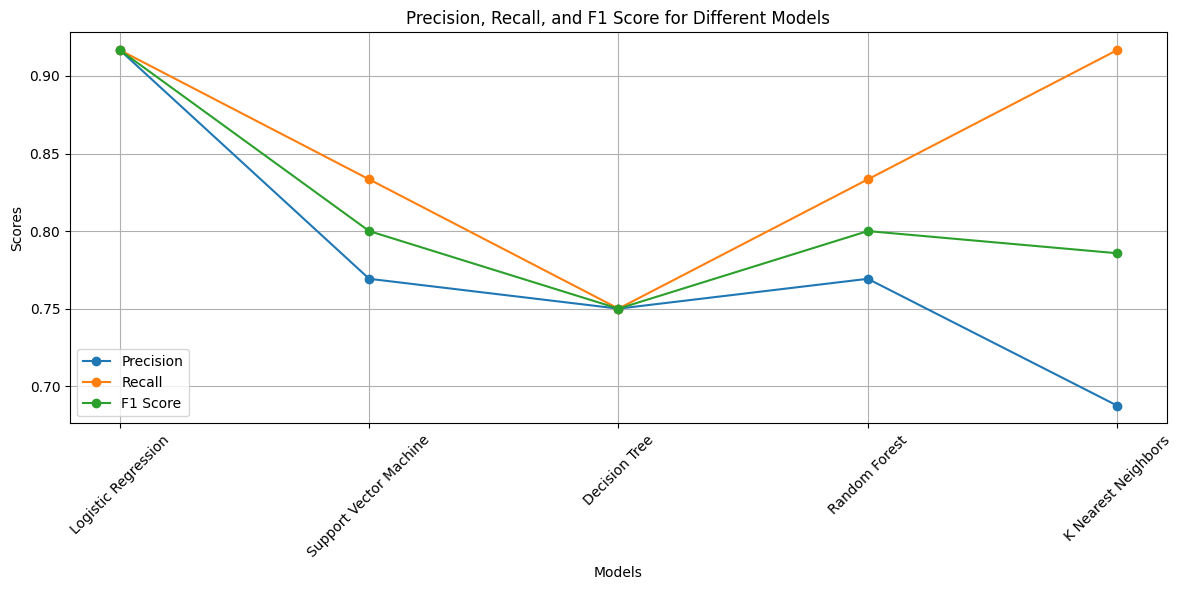

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Results for each model
results = {
    "Model": ["Logistic Regression", "Support Vector Machine", "Decision Tree", "Random Forest", "K Nearest Neighbors"],
    "Precision": [precision_score(y_test_01, y_predlogr), precision_score(y_test_01, y_pred_svm), precision_score(y_test_01, y_pred_dtc), precision_score(y_test_01, y_pred_rfc), precision_score(y_test_01, y_pred_knn)],
    "Recall": [recall_score(y_test_01, y_predlogr), recall_score(y_test_01, y_pred_svm), recall_score(y_test_01, y_pred_dtc), recall_score(y_test_01, y_pred_rfc), recall_score(y_test_01, y_pred_knn)],
    "F1 Score": [f1_score(y_test_01, y_predlogr), f1_score(y_test_01, y_pred_svm), f1_score(y_test_01, y_pred_dtc), f1_score(y_test_01, y_pred_rfc), f1_score(y_test_01, y_pred_knn)]
}

# Creating DataFrame
results_df = pd.DataFrame(results)

# Plotting the graph
plt.figure(figsize=(12, 6))

# Precision
plt.plot(results_df['Model'], results_df['Precision'], marker='o', label='Precision')

# Recall
plt.plot(results_df['Model'], results_df['Recall'], marker='o', label='Recall')

# F1 Score
plt.plot(results_df['Model'], results_df['F1 Score'], marker='o', label='F1 Score')

plt.title('Precision, Recall, and F1 Score for Different Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Heat map**

Precision: 0.9166666666666666
Recall: 0.9166666666666666
F1 Score: 0.9166666666666666


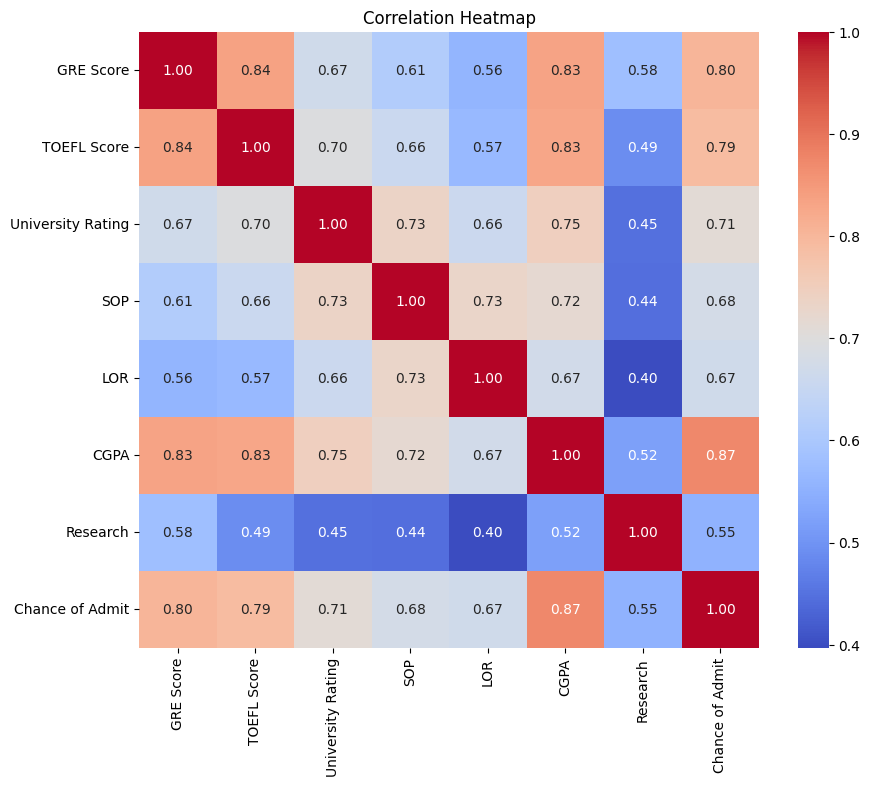

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Import Dataset
data = pd.read_csv('/content/Admission_Predict.csv')
data.drop('Serial No.', axis=1, inplace=True)
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ': 'LOR'}, axis=1, inplace=True)

# Prepare data for modeling
X = data.drop("Chance of Admit", axis=1)
y = data["Chance of Admit"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

y_train_01 = np.array([1 if each > 0.8 else 0 for each in y_train])
y_test_01 = np.array([1 if each > 0.8 else 0 for each in y_test])

# Train logistic regression model
logr = LogisticRegression()
logr.fit(X_train, y_train_01)
y_predlogr = logr.predict(X_test)

# Calculate performance metrics
precision = precision_score(y_test_01, y_predlogr)
recall = recall_score(y_test_01, y_predlogr)
f1 = f1_score(y_test_01, y_predlogr)

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Create correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()